# Objective:
1. Find Accuracy for Unoptimized LSTM Model

# Result:
- Training accuracy: 0.8357
- Valid acc : 0.8390

In [1]:
print('Innit Importing Library...')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

Innit Importing Library...


In [73]:
print('Innit Reading DataFrame...')
fpath = '/content/mydrive/MyDrive/personal_data/Random_Data/REA/name_gender.csv'
fpath = 'name_gender_clean.csv'
import pandas as pd
df = pd.read_csv(fpath)
print(df)

,Unnamed: 0,name,gender
0,0,shaqueil,M
1,1,demontre,M
2,2,aprill,F
3,3,daxter,M
4,4,dekorion,M
...,...,...,...
69437,69437,yuvraaj,M
69438,69438,carissa,F
69439,69439,kathyn,F
69440,69440,faolan,M


# for .values()

In [74]:
names = df['name']
gender = df['gender']
maxlen = 20
labels = 2

In [75]:
print("Male : " + str(sum(gender=='M')))
print("Female : " + str(sum(gender=='F')))

Male : 34721
Female : 34721


In [76]:
vocab = set(' '.join([str(i) for i in names]))
vocab.add('END')
len_vocab = len(vocab)

In [77]:
print('Innit Labelling character index as numerical inputs to LSTM')
#Label character index as numerical inputs to LSTM
char_index = dict((c, i) for i, c in enumerate(vocab))
print("char_index:",char_index)

{'e': 0,
 'm': 1,
 'o': 2,
 'END': 3,
 'b': 4,
 'j': 5,
 'l': 6,
 'h': 7,
 't': 8,
 's': 9,
 ' ': 10,
 'a': 11,
 'k': 12,
 'y': 13,
 'q': 14,
 'x': 15,
 'p': 16,
 'u': 17,
 'w': 18,
 'd': 19,
 'f': 20,
 'n': 21,
 'r': 22,
 'c': 23,
 'i': 24,
 'g': 25,
 'v': 26,
 'z': 27}

In [ ]:
print('Prepareing input from character_index...')

X = []
y = []

# Builds an empty line with a 1 at the index of character
def set_flag(i):
    tmp = np.zeros(len_vocab);
    tmp[i] = 1
    return list(tmp)

# Truncate names and create the matrix
def prepare_X(X):
    new_list = []
    trunc_train_name = [str(i)[0:maxlen] for i in X]

    for i in trunc_train_name:
        tmp = [set_flag(char_index[j]) for j in str(i)]
        for k in range(0,maxlen - len(str(i))):
            tmp.append(set_flag(char_index["END"]))
        new_list.append(tmp)

    return new_list


# Label Encoding of y
def prepare_y(y):
    new_list = []
    for i in y:
        if i == 'M':
            new_list.append([1,0])
        else:
            new_list.append([0,1])

    return new_list

X = prepare_X(names.values)
y = prepare_y(gender)

print("X[:5]:",X[:5])
print("y[:5]:",y[:5])

# Train Test Split

In [ ]:
print('Innit sklearn.preprocessing train_test_split')
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Unoptimized Model

In [ ]:
print('Initializing Model...')

In [25]:
model = Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(maxlen,len_vocab)))
# model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(10)))
# model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Fit Model

In [30]:
print('Fitting Model...')
batch_size = 256#256
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=1, validation_data =(X_test, y_test))#, callbacks=[callback, mc, reduce_lr_acc]

Epoch 1/5


2022-04-17 16:21:41.994047: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-17 16:21:44.066578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:21:44.426230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:21:44.440542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:21:44.722236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:21:44.733179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:21:45.247439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

  1/279 [..............................] - ETA: 17:57 - loss: 0.6799 - accuracy: 0.6250

2022-04-17 16:21:45.773788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:21:45.789982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


279/279 [==============================] - ETA: 0s - loss: 0.5457 - accuracy: 0.7208

2022-04-17 16:22:37.166883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:22:37.311497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:22:37.319340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:22:37.375087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:22:37.383179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


279/279 [==============================] - 57s 191ms/step - loss: 0.5457 - accuracy: 0.7208 - val_loss: 0.4835 - val_accuracy: 0.7678
Epoch 2/5
279/279 [==============================] - 10s 35ms/step - loss: 0.4490 - accuracy: 0.7942 - val_loss: 0.4213 - val_accuracy: 0.8114
Epoch 3/5
279/279 [==============================] - 10s 35ms/step - loss: 0.4105 - accuracy: 0.8171 - val_loss: 0.3982 - val_accuracy: 0.8246
Epoch 4/5
279/279 [==============================] - 10s 35ms/step - loss: 0.3943 - accuracy: 0.8245 - val_loss: 0.3866 - val_accuracy: 0.8267
Epoch 5/5
279/279 [==============================] - 10s 35ms/step - loss: 0.3772 - accuracy: 0.8357 - val_loss: 0.3662 - val_accuracy: 0.8390


In [2]:
print('Training Ended, plotting Accuracy')

Training Ended, plotting Accuracy


# Plot Accuracy, Train vs Validation 

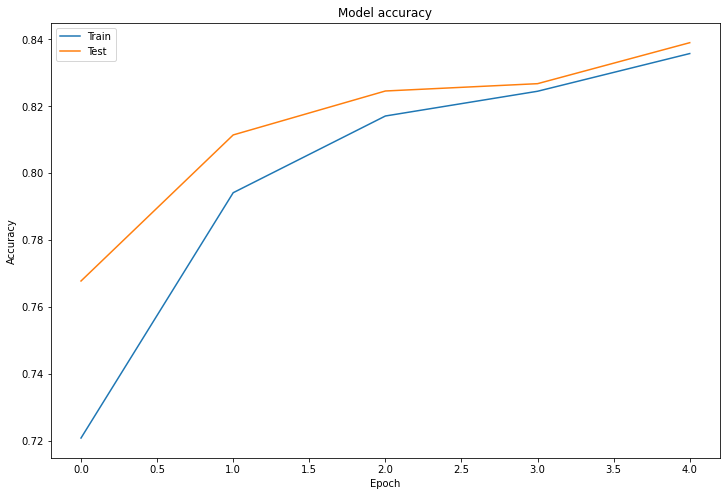

In [32]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### We can see Val_Accuracy: 0.8390

# Test Name If Desired

In [34]:
import re
# string with letters, numbers, and special characters
def clean_letters(s):
    # s = "BuckyBarnes@123"
    # keep only letters
    res = re.sub(r'[^a-zA-Z]', '', s)
    return res
df['name']=df['name'].apply(lambda x: clean_letters(x))
print(len(df))
df.head()

95025


,Unnamed: 0,name,gender
0,0,Aaban,M
1,1,Aabha,F
2,2,Aabid,M
3,3,Aabriella,F
4,4,Aada,F


# Add in New Name for Visualization of prediction

In [35]:
print('Commence Prediction')
new_names = ["mael", "jenny", "marc"]
X_pred = prepare_X([clean_letters(e) for e in new_names])

In [36]:
prediction = model.predict(X_pred)
prediction

2022-04-17 16:33:45.904292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:33:46.020691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:33:46.028128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:33:46.173899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-17 16:33:46.181503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.8277243 , 0.17227572],
       [0.1958829 , 0.8041171 ],
       [0.8750393 , 0.1249607 ]], dtype=float32)

In [39]:
print(prediction)

[[0.8277243  0.17227572]
 [0.1958829  0.8041171 ]
 [0.8750393  0.1249607 ]]


In [40]:
return_results = []
k = 0
dict_answer=['M','F']
for i in prediction:
    print(np.argmax(i))
    print(max(i))
    if max(i) < 0.65:
        return_results.append([new_names[k], "N"])
    else:
        return_results.append([new_names[k], dict_answer[np.argmax(i)]])
    k += 1
return_results

0
0.8277243
1
0.8041171
0
0.8750393


[['mael', 'M'], ['jenny', 'F'], ['marc', 'M']]

# Summary
### Val_Accuracy: 0.8390